In [ ]:
!pip install opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = os.path.join("drive", 'MyDrive', 'Colab Notebooks', 'data')

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 199 files belonging to 2 classes.


In [ ]:
data_it = data.as_numpy_iterator()

In [ ]:
batch = data_it.next()

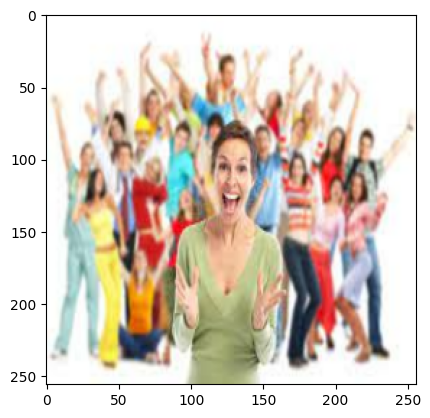

In [ ]:
plt.imshow(batch[0][1].astype(int))

In [ ]:
data = data.map(lambda x, y: (x / 255, y))

In [60]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [10]:
train_size + val_size + test_size, len(data)

(7, 7)

In [11]:
train = data.take(train_size);
val = data.skip(train_size).take(val_size);
test = data.skip(train_size + val_size).take(test_size);

# Build Deep NN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(32, (3, 3), 1, activation='relu',),
    MaxPooling2D(),

    Conv2D(16, (3, 3), 1, activation='relu',),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
his = model.fit(train, epochs=20, validation_data=val, callbacks=tensorboard_callback)

In [ ]:
fig = plt.figure()
plt.plot(his.history['loss'], color='teal', label='loss')
plt.plot(his.history['val_loss'], color='orange', label='val_loss')
fig.subplote('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save(os.path.join("drive", 'MyDrive', 'Colab Notebooks', 'happysad.h5'))

In [13]:
new_mod = tf.keras.models.load_model(os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'happysad.h5'))

1/1 [==============================] - 0s 20ms/step


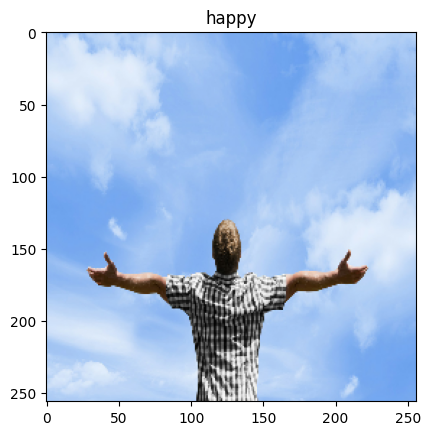

In [ ]:
img = test.as_numpy_iterator().next()[0][0]
plt.imshow(img)
p = new_mod.predict(np.array([img]))[0]
plt.title("happy" if p < 0.5 else 'sad')
plt.show()

In [ ]:
model.evaluate(test)

1/1 [==============================] - 4s 4s/step - loss: 6.9727e-32 - accuracy: 1.0000


[6.972666910334704e-32, 1.0]

In [14]:
import urllib.request

1/1 [==============================] - 0s 33ms/step
0.0  %


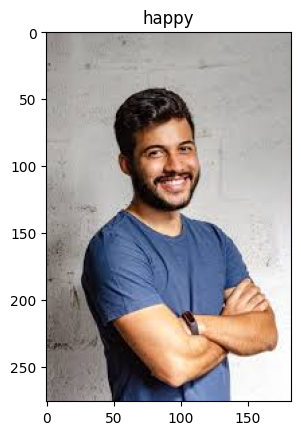

In [58]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTalTnxL604AYAhRBLY8ALueAe3Z5yiauJxHA&usqp=CAU'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.cvtColor( cv2.imdecode(arr, -1), cv2.COLOR_BGR2RGB )
# img = cv2.cvtColor(cv2.imread('https://efe.com.vn/wp-content/uploads/2017/07/Successful-year.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = tf.image.resize(img, (256, 256))
p = model.predict(np.array([img]))
plt.title("happy" if p < 0.5 else "sad")
print(p[0][0] * 100, " %")
plt.show()